# Solving the n-Queens Problem using Local Search

Student Name: Dimitri Lavin

I have used the following AI tools: [list tools]

I understand that my submission needs to be my own work: DL

## Instructions

Total Points: Undergrads 100 + 5 bonus / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file. 


## The n-Queens Problem

* __Goal:__ Find an arrangement of $n$ queens on a $n \times n$ chess board so that no queen is on the same row, column or diagonal as any other queen.

* __State space:__ An arrangement of the queens on the board. We restrict the state space to arrangements where there is only a single queen per column. We represent a state as an integer vector $\mathbf{q} = \{q_1, q_2, \dots, q_n\}$, each number representing the row positions of the queens from left to right. We will call a state a "board."

* __Objective function:__ The number of pairwise conflicts (i.e., two queens in the same row/column/diagonal).
The optimization problem is to find the optimal arrangement $\mathbf{q}^*$ of $n$ queens on the board can be written as:

  > minimize: $\mathrm{conflicts}(\mathbf{q})$
  >
  > subject to: $\mathbf{q} \ \text{contains only one queen per column}$

  Note: the constraint (subject to) is enforced by the definition of the state space.

* __Local improvement move:__ Move one queen to a different row in its column.

* __Termination:__ For this problem there is always an arrangement $\mathbf{q}^*$ with $\mathrm{conflicts}(\mathbf{q}^*) = 0$, however, the local improvement moves might end up in a local minimum. 

## Helper functions

In [248]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline
import math
from operator import itemgetter
import random
import pandas as pd
import time

np.random.seed(1234)


def random_board(n):
    """Creates a random board of size n x n. Note that only a single queen is placed in each column!"""
    
    return(np.random.randint(0,n, size = n))

def comb2(n): return n*(n-1)//2 # this is n choose 2 equivalent to math.comb(n, 2); // is int division

def conflicts(board):
    """Calculate the number of conflicts, i.e., the objective function."""

    n = len(board)
    
    horizontal_cnt = [0] * n
    diagonal1_cnt = [0] * 2 * n
    diagonal2_cnt = [0] * 2 * n
    
    for i in range(n):
        horizontal_cnt[board[i]] += 1
        diagonal1_cnt[i + board[i]] += 1
        diagonal2_cnt[i - board[i] + n] += 1
    
    return sum(map(comb2, horizontal_cnt + diagonal1_cnt + diagonal2_cnt))

# decrease the font size to fit larger boards
def show_board(board, cols = ['white', 'gray'], fontsize = 48):  
    """display the board"""
    
    n = len(board)
    
    # create chess board display
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0): 
                display[i,j] = 1
    
    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap, 
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])
    
    # place queens. Note: Unicode u265B is a black queen
    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = fontsize, 
                 horizontalalignment = 'center',
                 verticalalignment = 'center')
    
    print(f"Board with {conflicts(board)} conflicts.")
    plt.show()

## Create a board

Board with 4 conflicts.


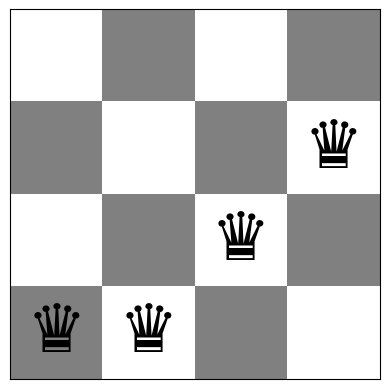

Queens (left to right) are at rows: [3 3 2 1]
Number of conflicts: 4


In [202]:
board = random_board(4)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

A board $4 \times 4$ with no conflicts:

Board with 0 conflicts.


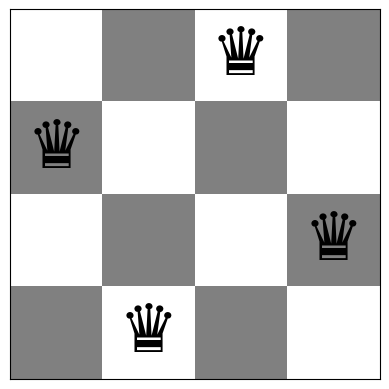

In [249]:
board = [1,3,0,2]
show_board(board)

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision. 
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally. 
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.

## Task 1: Steepest-ascend Hill Climbing Search [30 Points]

Calculate the objective function for all local moves (see definition of local moves above) and always choose the best among all local moves. If there are no local moves that improve the objective, then you have reached a local optimum. 

CPU times: user 1.4 ms, sys: 1.63 ms, total: 3.02 ms
Wall time: 1.76 ms
Board with 1 conflicts.


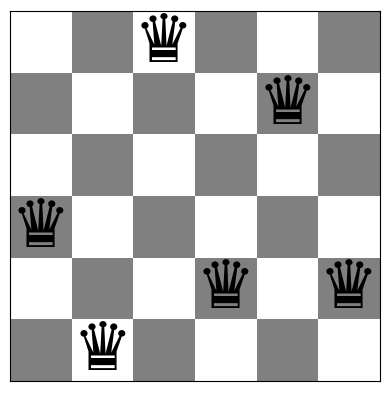

In [250]:
# Code and description go here
def steepest_ascent_neighbors(board):
    neighbors = [] #create a list of neighbors

    for col in range(len(board)):
        states = [] #create a list of possible moves

        for pos in range(len(board)):
            if(board[col] == pos): continue #continue if pos is the queen's current position

            new_state = board.copy() #copy board values
            new_state[col] = pos #move the queen's position to the new state

            new_score = conflicts(new_state) #calculate conflict score

            states.append((new_score,new_state.copy())) #append to list of possible moves

        min_score = min(states, key = itemgetter(0)) #store the state with the best score
        neighbors.append((min_score[0],min_score[1].copy())) #append to list of neighbors
    return neighbors

def steepest_ascent_hill_climbing(board = None, size=6, max_steps=10000):
    if(board == None): #if no board is passed, create a random board
        current = random_board(size)
    else: #else, use the board that was passed
        current = board

    current_score = conflicts(current) #calculate score of the current board

    for step in range(max_steps): #loop through algorithm until a solution is found or maximum steps is reached
        neighbors = steepest_ascent_neighbors(current) #find neighbors
        best_neighbor = min(neighbors, key = itemgetter(0)) #find the neighbor with the best score

        if(best_neighbor[0] < current_score): #update current score if best neighbor has a better score
            current_score = best_neighbor[0]
            current = best_neighbor[1]
        else: #else, ignore the best neighbor score
            return (current_score, current)
    
%time result = steepest_ascent_hill_climbing(size = 6)
show_board(result[1])

## Task 2: Stochastic Hill Climbing 1 [10 Points]

Chooses randomly from among all uphill moves till you have reached a local optimum.

CPU times: user 4.95 ms, sys: 1.72 ms, total: 6.68 ms
Wall time: 1.77 ms
Board with 2 conflicts.


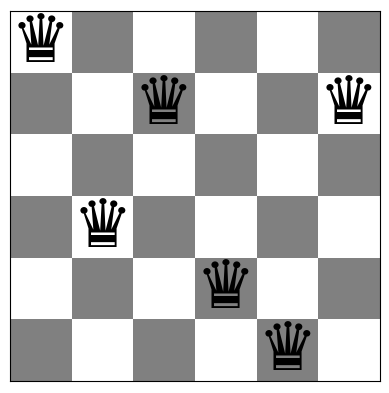

In [205]:
# Code and description go here
def stochastic_neighbors(board, score):
    neighbors = [] #create a list of neighbors

    for col in range(len(board)):
        for pos in range(len(board)):
            if(board[col] == pos): continue #continue if pos is the queen's current position

            new_state = board.copy() #copy board values
            new_state[col] = pos #move the queen's position to the new state

            new_score = conflicts(new_state) #calculate conflict score
            # if we have a state with better score, add to neighbors list 
            if(new_score < score): #if new state has a better score, append to list of neighbors
                neighbors.append((new_score,new_state.copy()))
    return neighbors


def stochastic_hill_climbing(board = None, size=6, max_steps=10000):
    if(board == None): #if no board is passed, create a random board
        current = random_board(size)
    else: #else, use the board that was passed
        current = board

    current_score = conflicts(current) #calculate score of the current board

    for step in range(max_steps): #loop through algorithm until a solution is found or maximum steps is reached
        neighbors = stochastic_neighbors(current, current_score) #find neighbors that have a better score than current position

        if(len(neighbors) != 0): #if there's at least one neighbor, randomly choose a neighbor from the list
            new_neighbor = random.choice(neighbors)
            current_score = new_neighbor[0]
            current = new_neighbor[1]
        else: #else, return the current position
            return (current_score,current)
    
%time result = stochastic_hill_climbing(size = 6)
show_board(result[1])

## Task 3: Stochastic Hill Climbing 2 [20 Points]

A popular version of stochastic hill climbing generates only a single random local neighbor at a time and accept it if it has a better objective function value than the current state. This is very efficient if each state has many possible successor states. This method is called "First-choice hill climbing" in the textbook.

__Notes:__ 

* Detecting local optima is tricky! You can, for example, stop if you were not able to improve the objective function during the last $x$ tries.

The limit of 1000 steps for detecting local optima has been reached, NO  SOLUTION FOUND.
CPU times: user 36.6 ms, sys: 7.5 ms, total: 44.1 ms
Wall time: 9.61 ms
Board with 2 conflicts.


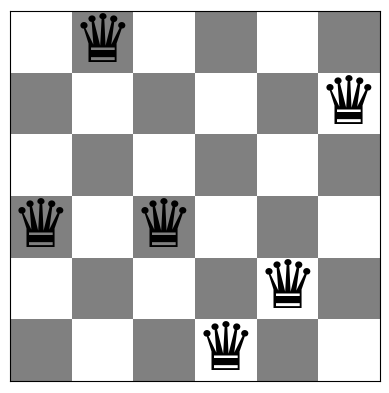

In [206]:
# Code and description go here
def stochastic_neighbors2(board, size):
    new_neighbor = board.copy() #copy the board that was passed

    col = random.randint(0, size-1) #randomly choose a queen to move
    pos = random.randint(0, size-1) #randomly choose the position the queen will move to

    while(new_neighbor[col] == pos): #keep generating a random position if the position is the current position of the queen
        pos = random.randint(0, size-1)

    new_neighbor[col] = pos #relocate queen to new position
    new_score = conflicts(new_neighbor) #calculate conlict score

    return (new_score,new_neighbor)

def stochastic_hill_climbing2(board = None, size=6, max_steps=10000, limit_reached=1000):
    if(board == None): #if no board is passed, create a random board
        current = random_board(size)
    else: #else, use the board that was passed
        current = board
        size = len(current)

    current_score = conflicts(current) #calculate score of the current board
    step_limit_counter = 0 #variable to keep track of the steps taken since the start of finding next best solution

    for step in range(max_steps): #loop through algorithm until a solution is found or maximum steps is reached
        if(step_limit_counter >= limit_reached): #if no solution is found after maxxing out at limit_reached, then return the current solution
            print(f"The limit of {limit_reached} steps for detecting local optima has been reached, NO  SOLUTION FOUND.")
            return (current_score,current)
        if(current_score == 0):
            return (current_score,current)

        neighbor = stochastic_neighbors2(current, size) #find neighbors that have a better score than current position

        if(neighbor[0] < current_score): #update current score if neighbor has a better score
            current_score = neighbor[0]
            current = neighbor[1]
            step_limit_counter = 0 #reset step limit counter since new best solution was found

        step_limit_counter = step_limit_counter + 1 #increase step limit counter by one since a better solution was not found

    return (current_score,current)
    
%time result = stochastic_hill_climbing2(size = 6)
show_board(result[1])

## Task 4: Hill Climbing Search with Random Restarts [10 Points]

Hill climbing will often end up in local optima. Restart the each of the three hill climbing algorithm up to 100 times with a random board to find a better (hopefully optimal) solution. Note that restart just means to run the algorithm several times starting with a new random board.

STEEPEST-ASCEND HILL CLIMBING
RESTART 0 IN PROGRESS
RESTART 1 IN PROGRESS
RESTART 2 IN PROGRESS
RESTART 3 IN PROGRESS
RESTART 4 IN PROGRESS
RESTART 5 IN PROGRESS
RESTART 6 IN PROGRESS
RESTART 7 IN PROGRESS
RESTART 8 IN PROGRESS
RESTART 9 IN PROGRESS
RESTART 10 IN PROGRESS
RESTART 11 IN PROGRESS
RESTART 12 IN PROGRESS
RESTART 13 IN PROGRESS
RESTART 14 IN PROGRESS
RESTART 15 IN PROGRESS
RESTART 16 IN PROGRESS
RESTART 17 IN PROGRESS
RESTART 18 IN PROGRESS
RESTART 19 IN PROGRESS
RESTART 20 IN PROGRESS
RESTART 21 IN PROGRESS
CPU times: user 41.1 ms, sys: 9.58 ms, total: 50.6 ms
Wall time: 16.3 ms
Board with 0 conflicts.


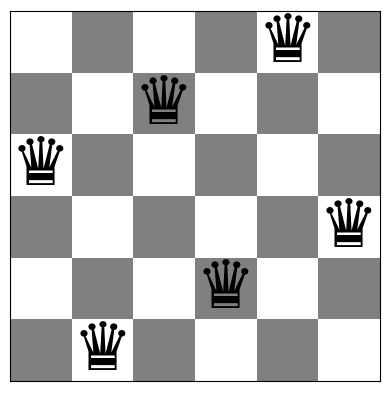

STOCHASTIC HILL CLIMBING
RESTART 0 IN PROGRESS
RESTART 1 IN PROGRESS
RESTART 2 IN PROGRESS
RESTART 3 IN PROGRESS
RESTART 4 IN PROGRESS
RESTART 5 IN PROGRESS
RESTART 6 IN PROGRESS
RESTART 7 IN PROGRESS
RESTART 8 IN PROGRESS
RESTART 9 IN PROGRESS
RESTART 10 IN PROGRESS
RESTART 11 IN PROGRESS
RESTART 12 IN PROGRESS
RESTART 13 IN PROGRESS
CPU times: user 28.2 ms, sys: 4.85 ms, total: 33 ms
Wall time: 10.5 ms
Board with 0 conflicts.


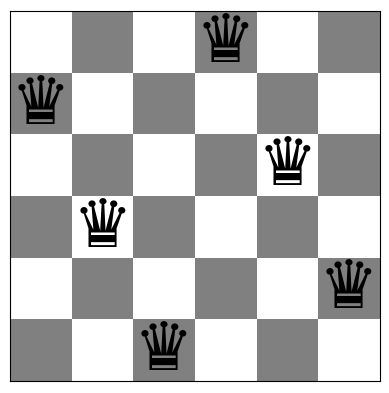

STOCHASTIC HILL CLIMBING 2
RESTART 0 IN PROGRESS
The limit of 1000 steps for detecting local optima has been reached, NO  SOLUTION FOUND.
RESTART 1 IN PROGRESS
The limit of 1000 steps for detecting local optima has been reached, NO  SOLUTION FOUND.
RESTART 2 IN PROGRESS
CPU times: user 39.2 ms, sys: 5.83 ms, total: 45.1 ms
Wall time: 14.1 ms
Board with 0 conflicts.


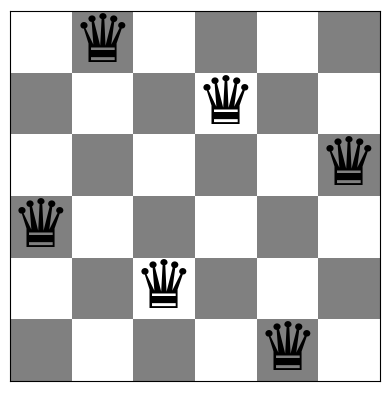

In [207]:
# Code and description go here
def random_restarts(board = None, size = 4, code = 'shc', max_steps=10000, restarts=100):
    if(board == None): #if no board is passed, create a random board
        board = random_board(size)
        
    best_score = conflicts(board)
    best_solution = board

    if(code == 'shc'): #shc code stands for steepest-ascend hill climbing
        print("STEEPEST-ASCEND HILL CLIMBING")
    elif(code == 'shc1'): #sch1 code stands for stochastic hill climbing
        print("STOCHASTIC HILL CLIMBING")
    elif(code == 'shc2'): #sch2 code stands for stoachastic hill climbing 2
        print("STOCHASTIC HILL CLIMBING 2")
    
    for i in range(restarts): #for each restart, run the appropriate search method
        print(f"RESTART {i} IN PROGRESS")#print out the current restart in progress

        if(code == 'shc'): 
            result = steepest_ascent_hill_climbing(size=size, max_steps=max_steps)
        elif(code == 'shc1'): 
            result = stochastic_hill_climbing(size=size, max_steps=max_steps)
        elif(code == 'shc2'): 
            result = stochastic_hill_climbing2(size=size, max_steps=max_steps)

        if(result[0] < best_score): #replace best score with the new result if it is a better score
            best_score = result[0]
            best_solution = result[1]

        if(best_score == 0): #return the solution if it has a conflict score of 0
            return (best_score,best_solution)

    return (best_score,best_solution)

%time result = random_restarts(size=6, code='shc', restarts=100) #result for steepest-ascend hill climbing search
show_board(result[1])

%time result2 = random_restarts(size=6, code='shc1', restarts=100) #result for stochastic hill climbing search
show_board(result2[1])

%time result3 = random_restarts(size=6, code='shc2', restarts=100) #result for stochastic hill climbing 2 search
show_board(result3[1])

## Task 5: Simulated Annealing [10 Points]

Simulated annealing is a form of stochastic hill climbing that avoid local optima by also allowing downhill moves with a probability proportional to a temperature. The temperature is decreased in every iteration following an annealing schedule. You have to experiment with the annealing schedule (Google to find guidance on this).


1. Implement simulated annealing for the n-Queens problem.
2. Compare the performance with the previous algorithms. 
2. Discuss your choice of annealing schedule.

CPU times: user 50.5 ms, sys: 15.6 ms, total: 66.2 ms
Wall time: 19 ms
Board with 0 conflicts.


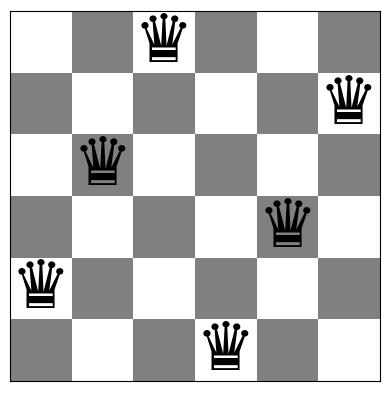

In [208]:
# Code and description go here
def simulated_annealing_neighbor(board, size):
    new_neighbor = board.copy() #copy the board that was passed
    col = random.randint(0, size-1) #randomly choose a queen to move
    pos = random.randint(0, size-1) #randomly choose the position the queen will move to

    while(new_neighbor[col] == pos): #keep generating a random position if the position is the current position of the queen
        pos = random.randint(0, size-1)

    new_neighbor[col] = pos #relocate queen to new position
    new_score = conflicts(new_neighbor) #calculate conflict score

    return (new_score,new_neighbor)

def simulated_annealing(board = None, size = 6, T0 = None, alpha = 0.999, epsilon = 1e-3):
    if(board == None): #if no board is passed, create a random board
        current = random_board(size)
    else: #else, use the board that was passed
        current = board
        size = len(current)

    current_score = conflicts(current) #calculate conflict score

    if(T0 is None): #set T0 if no value was passed
        T0 = (size^2) / 2

    T = T0 #initialize T with T0
    t = 0 #initialize t to 0

    while(T > epsilon):
        T = T0 * alpha ** t # calculate temperature using schedule
        neighbor = simulated_annealing_neighbor(current, size) #find a neighbor
        deltaE = neighbor[0] - current_score #calculate deltaE using the neighbor and current score

        if(deltaE < 0 or np.random.rand() < math.exp(-deltaE/T)): #if the neighbor has a better score, move the queen to the neighbor's position
            current = neighbor[1]
            current_score = neighbor[0]
            
            if(current_score == 0): #if the conflict score is 0, then return
                return (current_score, current)
       
        t += 1
        
    return (current_score, current)

%time result = simulated_annealing(size=6)
show_board(result[1])

Compared to the previous algorithms, simulated annealing has longer runtimes. On average from the run times calculated from all of the search methods, simulated annealing had a run time that was more than double than the majority of the other methods. Because these n-Queens problems are of smaller scale, the other search methods perform well at a smaller scale compared to simulated annealing. If my computer could compute problems of larger scale in a timely manner, simulated annealing could potentially outperform these other search methods. However, where it lacks in speed, it makes up for in success. Simulated annealing has higher success rates in achieving optimal scores when compared to the other search methods. This was seen after performing Task 6.

The annealing schedule I chose was to allow for flexibility in adjusting the temperature decay rate 'alpha'. By varying 'alpha', one can control the speed at which the temperature decreases, influencing the balance between exploration and exploitation. A higher value of 'alpha' leads to faster cooling and more focused exploration, while a lower value allows for more exploration of the search space.

## Task 6: Compare Performance [10 Points]

Compare the algorithm using runtime and objective function values. Use boards of size 4 and 8 to explore how the different algorithms perform. Make sure that you run the algorithms for each board size several times (at least 100 times) with different starting boards and report averages.

Complete the following table

| Algorithm           | Board size | Avg. Run time | Avg. number of conflicts | % of runs ending in optimal solution  |
| ------------------- | ---------- | ------------- | --------------------------------- | - |
| Steepest asc. HC    |     4      |               |                                   |   |
| Stochastic HC 1     |     4      |               |                                   |   |
| Stochastic HC 2     |     4      |               |                                   |   |
| Simulated Annealing |     4      |               |                                   |   |
| Steepest asc. HC    |     8      |               |                                   |   |
| Stochastic HC 1     |     8      |               |                                   |   |
| Stochastic HC 2     |     8      |               |                                   |   |
| Simulated Annealing |     8      |               |                                   |   |


Add the used code and the answer to the following questions below.

* How do the algorithms scale with problem size? You will need to run more board sizes. You can add the results to the table above and show the result as a chart.

* What is the largest board each algorithm can solve in a reasonable amount time?

Hint: See [Profiling Python Code](../HOWTOs/profiling_code.ipynb) for help about how to measure runtime in Python.

In [251]:
# Code, results, charts and discussion go here
board_size = [4, 8, 20] #board sizes for comparison

search_methods = { #all available search methods
    steepest_ascent_hill_climbing: "Steepest Ascent",
    stochastic_hill_climbing: "Stochastic",
    stochastic_hill_climbing2: "First Choice",
    simulated_annealing: "Simulated Annealing"
}

compare_performance = pd.DataFrame() #dataframe to hold data

for size in board_size:
    data = pd.DataFrame({'Algorithm': [], 'Board Size': [], 'Avg. Run time': [],'Avg. number of conflicts': [],"'%' of runs ending in optimal solution": []})
    for algo in search_methods.items():
        runtimes = [] #create a list to store run times
        conflict_list = [] #create a list to store conflict scores
        optimal_count = 0 #create a counter to keep track of every optimal score

        for i in range(100): #loop 100 times to find run time, avg number of conflicts, and the number of optimal solutions
            start_time = time.time()
            result = algo[0](size=size)
            end_time = time.time()

            runtimes.append((end_time-start_time) * 1e3) #append the run time
            conflict_list.append(result[0]) #append the conflict score
            if(result[0] == 0): optimal_count += 1 #increment optimal score counter by one if the conflict score was optimal

        data = data._append({
            'Algorithm': algo[1],
            'Board Size': size,
            'Avg. Run time': (sum(runtimes) / len(runtimes)),
            'Avg. number of conflicts': (sum(conflict_list) / len(conflict_list)),
            "'%' of runs ending in optimal solution": (optimal_count / len(conflict_list) * 100)
        }, ignore_index=True)

    display(data)
    compare_performance = compare_performance._append(data)


The limit of 1000 steps for detecting local optima has been reached, NO  SOLUTION FOUND.
The limit of 1000 steps for detecting local optima has been reached, NO  SOLUTION FOUND.
The limit of 1000 steps for detecting local optima has been reached, NO  SOLUTION FOUND.
The limit of 1000 steps for detecting local optima has been reached, NO  SOLUTION FOUND.
The limit of 1000 steps for detecting local optima has been reached, NO  SOLUTION FOUND.
The limit of 1000 steps for detecting local optima has been reached, NO  SOLUTION FOUND.
The limit of 1000 steps for detecting local optima has been reached, NO  SOLUTION FOUND.
The limit of 1000 steps for detecting local optima has been reached, NO  SOLUTION FOUND.
The limit of 1000 steps for detecting local optima has been reached, NO  SOLUTION FOUND.
The limit of 1000 steps for detecting local optima has been reached, NO  SOLUTION FOUND.
The limit of 1000 steps for detecting local optima has been reached, NO  SOLUTION FOUND.
The limit of 1000 ste

,Algorithm,Board Size,Avg. Run time,Avg. number of conflicts,'%' of runs ending in optimal solution
0,Steepest Ascent,4.0,0.143545,0.54,48.0
1,Stochastic,4.0,0.124943,0.75,37.0
2,First Choice,4.0,3.087249,0.96,27.0
3,Simulated Annealing,4.0,0.433617,0.00,100.0


The limit of 1000 steps for detecting local optima has been reached, NO  SOLUTION FOUND.
The limit of 1000 steps for detecting local optima has been reached, NO  SOLUTION FOUND.
The limit of 1000 steps for detecting local optima has been reached, NO  SOLUTION FOUND.
The limit of 1000 steps for detecting local optima has been reached, NO  SOLUTION FOUND.
The limit of 1000 steps for detecting local optima has been reached, NO  SOLUTION FOUND.
The limit of 1000 steps for detecting local optima has been reached, NO  SOLUTION FOUND.
The limit of 1000 steps for detecting local optima has been reached, NO  SOLUTION FOUND.
The limit of 1000 steps for detecting local optima has been reached, NO  SOLUTION FOUND.
The limit of 1000 steps for detecting local optima has been reached, NO  SOLUTION FOUND.
The limit of 1000 steps for detecting local optima has been reached, NO  SOLUTION FOUND.
The limit of 1000 steps for detecting local optima has been reached, NO  SOLUTION FOUND.
The limit of 1000 ste

,Algorithm,Board Size,Avg. Run time,Avg. number of conflicts,'%' of runs ending in optimal solution
0,Steepest Ascent,8.0,1.528125,1.19,17.0
1,Stochastic,8.0,1.843979,1.17,16.0
2,First Choice,8.0,7.417557,1.33,14.0
3,Simulated Annealing,8.0,22.163467,0.00,100.0


The limit of 1000 steps for detecting local optima has been reached, NO  SOLUTION FOUND.
The limit of 1000 steps for detecting local optima has been reached, NO  SOLUTION FOUND.
The limit of 1000 steps for detecting local optima has been reached, NO  SOLUTION FOUND.
The limit of 1000 steps for detecting local optima has been reached, NO  SOLUTION FOUND.
The limit of 1000 steps for detecting local optima has been reached, NO  SOLUTION FOUND.
The limit of 1000 steps for detecting local optima has been reached, NO  SOLUTION FOUND.
The limit of 1000 steps for detecting local optima has been reached, NO  SOLUTION FOUND.
The limit of 1000 steps for detecting local optima has been reached, NO  SOLUTION FOUND.
The limit of 1000 steps for detecting local optima has been reached, NO  SOLUTION FOUND.
The limit of 1000 steps for detecting local optima has been reached, NO  SOLUTION FOUND.
The limit of 1000 steps for detecting local optima has been reached, NO  SOLUTION FOUND.
The limit of 1000 ste

,Algorithm,Board Size,Avg. Run time,Avg. number of conflicts,'%' of runs ending in optimal solution
0,Steepest Ascent,20.0,54.617031,2.15,2.0
1,Stochastic,20.0,77.342184,2.44,2.0
2,First Choice,20.0,25.207732,2.58,1.0
3,Simulated Annealing,20.0,111.442041,0.29,71.0


As the problems scale with size, it is obvious that they take longer. But, it is interesting to note how the percent of runs that end in optimal solution also decrease. For times' sake, I tested the search methods with sizes of 4, 8, and 20, and as the sizes increased the percent of runs reaching optimal solution decreased. This is potentially happening due to some of the limitations set by the search methods, for example like the step limit in local optima that is present with stochastic hill climbing 2 or the max number of steps allowed for each of the search methods. 

From testing the run times for each search method, they can each solve the n-Queens problem of size 20 in reasonable time, but seem to go on and on once the problem reaches a size of 50 or more. It is possible that the window could be smaller or larger depending on the limitations in the written code as mentioned before, but from the run times it is safe to say that somewhere in the range of size 20 to 50 we find a maximum size that runs in a reasonable amount of time. The times recorded for 50 or more are not present in the output because they were not ending any time soon, so their processes were interrupted.

## Advanced task: Exploring other Local Moves

* __Graduate students__ need to complete this task [10 points]
* __Undergraduate students__ can attempt this as a bonus task [max +5 bonus points].

Implement a few different local moves. Implement:

* moving one queen only one square at a time
* switching two columns
* move two queens at a time 

Compare the performance of these moves for the 8-Queens problem using your stochastic hill climbing 2 implementation from above. Also consider mixing the use of several types of local moves (e.g., move one queen and moving two queens).

Describe what you find out about how well these moves and combinations of these moves work.

In [210]:
# Code and description go here
def stochastic_neighbors2(board, size):
    new_neighbor = board.copy() #copy the board that was passed

    col = random.randint(0, size-1) #randomly choose a queen to move
    pos = random.randint(0, size-1) #randomly choose the position the queen will move to

    while(new_neighbor[col] == pos): #keep generating a random position if the position is the current position of the queen
        pos = random.randint(0, size-1)

    new_neighbor[col] = pos #relocate queen to new position
    new_score = conflicts(new_neighbor) #calculate conlict score

    return (new_score,new_neighbor)

def stochastic_hill_climbing2(board = None, size=6, max_steps=10000, limit_reached=1000):
    if(board == None): #if no board is passed, create a random board
        current = random_board(size)
    else: #else, use the board that was passed
        current = board
        size = len(current)

    current_score = conflicts(current) #calculate score of the current board
    step_limit_counter = 0 #variable to keep track of the steps taken since the start of finding next best solution

    for step in range(max_steps): #loop through algorithm until a solution is found or maximum steps is reached
        if(step_limit_counter >= limit_reached): #if no solution is found after maxxing out at limit_reached, then return the current solution
            print(f"The limit of {limit_reached} steps for detecting local optima has been reached, NO  SOLUTION FOUND.")
            return (current_score, current)
        if(current_score == 0):
            return (current_score, current)

        neighbor = stochastic_neighbors2(current, size) #find neighbors that have a better score than current position

        if(neighbor[0] < current_score): #update current score if neighbor has a better score
            current_score = neighbor[0]
            current = neighbor[1]
            step_limit_counter = 0 #reset step limit counter since new best solution was found

        step_limit_counter = step_limit_counter + 1 #increase step limit counter by one since a better solution was not found

    return (current_score, current)
    
%time result = stochastic_hill_climbing2(size = 6)
show_board(result[1])

I wasn't able to get the above implementations to work, but I can make an educated guess as to what outcomes they could potentially have as well as any behavior they may have while performing stochastic hill climbing 2. 

Moving one queen only one square at a time could greatly reduce the runtime of the algorithm, as well as potentially lead the algorithm to place the queens in undesired locations because it isn't placing the queen in the 'best' location for its given column. This can skew the results of the other queens, thus overall negatively impacting the conflict score of the board.

Switching two columns can be potentially beneficial because of how a queen can line up diagonally in comparison to other queens. If certain queens were diagonally intersecting each other, switching two columns could help avoid these certain situations. However, they could also be harmful by placing each other in diagonally intersecting locations.



## More things to do

Implement a Genetic Algorithm for the n-Queens problem.

Board with 5 conflicts.


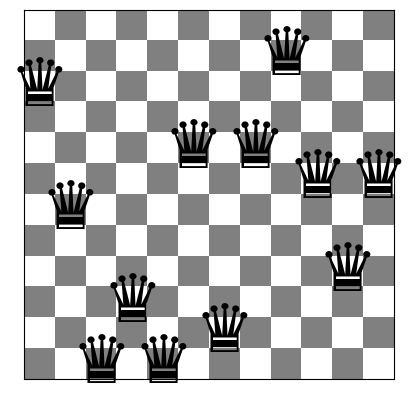

In [240]:
# Code and description go here
def genetic_search(size, population_size=10, generations=500, selection_probability=0.25, mutation_probability = 0.1):
    population = [] #create a list for the populations

    for i in range(population_size): #create the initial population
        board = random_board(size)
        board_score = conflicts(board)
        population.append((board_score, board.copy()))
    
    best_solution = min(population, key = itemgetter(0))[1] #determine the best solution from population
    best_score = min(population, key = itemgetter(0))[0] #determine the best score from population
    
    population.sort(key=lambda x:x[0]) #sort the populations by best value
    
    for generation in range(generations):
        selection_population = selection(population, population_size, selection_probability) #select the number from total population based on probability
        crossover_pop = crossover(size, selection_population) #perform crossover operation
        selection_population.extend(crossover_pop) #add the crossover to the selected population

        population = mutation(size, selection_population, mutation_probability) #perform mutation

        population.sort(key=lambda x:x[0]) #sort the populations by best value

        if(population[0][0] < best_score): #if the updated population is better than the best score, update best score and best solution
            best_score = population[0][0]
            best_solution = population[0][1].copy()

            if(best_score == 0): #return if the optimal solution was found
                return (best_score, best_solution)

    return((best_score, best_solution))
        
def selection(population, population_size, probability):
    selected_num = population_size * probability #determine what number of the total population to choose from
    return population[0:int(selected_num)].copy() #return the calculated number of solutions from the total population

def crossover(size, selection_population):
    selected = selection_population.copy() #create a copy of the selected population
    crossover_population = [] #create a list for the crossover population

    for i in range(int(len(selection_population)/2)): #perform crossover operation after iterating through half of the solutions
        population1 = selected.pop(random.randint(0, len(selected)-1)) #solution one to crossover
        population2 = selected.pop(random.randint(0, len(selected)-1)) #solution two to crossover
        crossover_index = random.randint(1, size-2) #determine crossover index

        c1 = np.concatenate(( population1[1][0:crossover_index], population2[1][crossover_index:size] )) #crossover outcomes
        c2 = np.concatenate(( population2[1][0:crossover_index], population1[1][crossover_index:size] ))

        crossover_population.append((conflicts(c1), c1.copy())) #append crossover scores and copies to the crossover population list
        crossover_population.append((conflicts(c2), c2.copy()))
        
    return crossover_population

def mutation(size, selection_population, mutation_probability):
    mutations = int(len(selection_population) * mutation_probability) #determine number of mutations

    for i in range(mutations):
        random_mutate_index = random.randint(0, len(selection_population)-1) #randomly pick a population to mutate
        mutate_population = selection_population[random_mutate_index][1] #mutate the population

        col = random.randint(0, size-1) #randomly choose a column for mutation
        row = random.randint(0, size-1) #randomly choose a row for mutation

        mutate_population[col] = row #mutate
        selection_population[random_mutate_index] = (conflicts(mutate_population), mutate_population.copy()) #add mutated population back to selection population
        
    return selection_population.copy()

result = genetic_search(size=12)
show_board(result[1])